In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [103]:
df=pd.read_csv("/content/advertising.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [104]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [105]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [106]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,# test set size 20%
                                           random_state=1,#for repeated results
                                           )

In [108]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

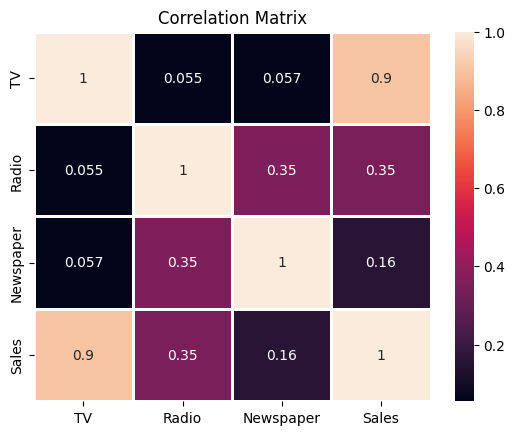

In [109]:
mat=df.corr(numeric_only=True)
sns.heatmap(mat,annot=True,linewidths=1)
plt.title("Correlation Matrix")
plt.show()

In [110]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)
print(f"R² Score:{round(r2_score(ytest,ypred)*100,2)}%")
print("MSE:",mean_squared_error(ytest,ypred))

Coefficients: [ 0.05507865  0.10308563 -0.00090115]
Intercept: 4.63762444239792
R² Score:87.47%
MSE: 2.409333612892369


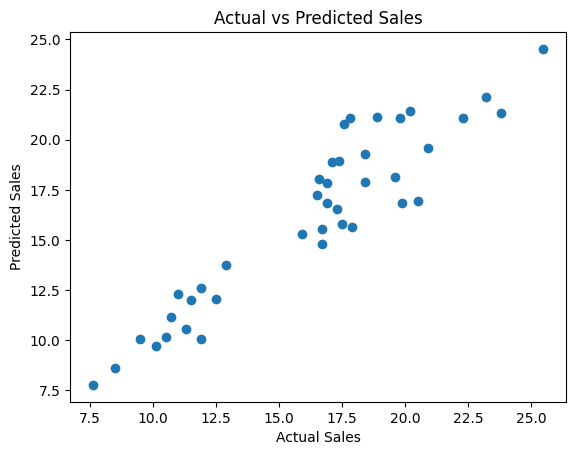

In [113]:
plt.scatter(ytest,ypred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()